# Jupyter Notebook
* interactive computing
* cells can be a code, markdown or raw text
* prints out last time of cell, no need to add `print()`
* use markdown to write your thoughts
* two modes: command mode and edit mode

## shortcuts to remember:
* `enter` or `double-click`, start edit mode
* `esc` to return to command mode
* `shift+enter` execute current cell and move to next
* `ctrl+enter` execute current cell and stay there
* `a` and `b`, add cell above or below
* `dd` delete a cell
* `c` and then `v`, copy and paste a cell
* `m` turn cell into markdown
* `y` trun cell into code

# The basics

In [1]:
# no data type declaration
a = 3
b = 19
a+b

22

In [2]:
# string concat
first_name = 'Shaji'
second_name = 'P'
first_name+' '+second_name

'Shaji P'

In [3]:
# string method example
statement = "this is a sentence"
statement.count('s')

3

In [4]:
# string method example
statement.split()

['this', 'is', 'a', 'sentence']

In [5]:
# Python list
x = [12,9,6,4]
y = [1,2,4]
x+y # lists are concatenated

[12, 9, 6, 4, 1, 2, 4]

In [6]:
# list method example
z = x+y
z.count(4)

2

In [7]:
# in-build sum function
sum(x)

31

In [8]:
# in-built sort
sorted(x)

[4, 6, 9, 12]

In [9]:
# using functions from math
from math import pi,sqrt
r = 4
sqrt(2*pi*r)

5.0132565492620005

## Plotting

In [10]:
import matplotlib.pyplot as plt
import numpy as np # see next section
%matplotlib inline

In [11]:
# create range of values from 0 to 2pi in steps of 0.1
x = np.arange(0,2*pi,0.1)

In [12]:
# create y as sine function with x as independent variable
y = np.sin(x)

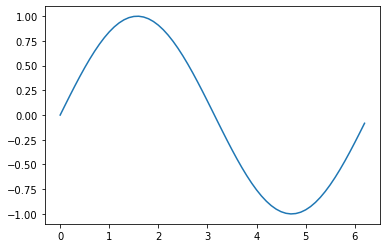

In [13]:
# graph for the function y
plt.plot(x,y)

## Numpy

In [14]:
# numpy, the backborne of scientific computing 
# all array related operations are defined in numpy
import numpy as np

In [15]:
# create 2x3 array of 1's
x_arr = np.ones((2,3))
x_arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [16]:
# adds a scalar value element wise
x_arr + 4

array([[5., 5., 5.],
       [5., 5., 5.]])

In [17]:
x_arr
# to reflect change, store the values to the old array
# uncomment below two lines to see the change
#x_arr = x_arr+4
#x_arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
y_arr = np.array([2,2,2])
y_arr

array([2, 2, 2])

In [19]:
# array broadcasting
# matches the shape and adds the y_arr row to each -
# row of x_arr
x_arr + y_arr

array([[3., 3., 3.],
       [3., 3., 3.]])

In [20]:
y_arr = np.array([5,8])
x_arr+y_arr # broadcasting fails

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [21]:
# to rectifyabove error and add elements of y_arr to each column of x_arr
# change "orentation of y_arr" first
y_arr[:,np.newaxis] 

array([[5],
       [8]])

In [22]:
# now you can add them
y_arr[:,np.newaxis]  + x_arr

array([[6., 6., 6.],
       [9., 9., 9.]])

## Speeding up operations with code change

In [23]:
import random
import numba

In [24]:
# create a list of 10k random elements
x = [random.random() for i in range(10000)]
y = [random.random() for i in range(10000)]
z = [] # empty list to store result

In [25]:
%%time
# first, let's try good old for loop
for i in range(len(x)):
    z.append(x[i] + y[i])
print(z[:3]) # print first 3 elements

[1.1283621754625048, 0.2769602771830638, 1.3047048685490248]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.46 ms


In [26]:
%%time
# now list comprehension
z  = [x[i] + y[i] for i in range(len(x))]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.36 ms


In [27]:
%%time
# using zip()
# zip() and enumerate() are useful functions
z  = [a + b for a,b in zip(x,y)]

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 1.21 ms


In [28]:
# create numpy arrays
xa = np.array(x)
ya = np.array(y)

In [29]:
%%time
# using numpy addition
za = xa+ya
za[:3]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 154 µs


array([1.12836218, 0.27696028, 1.30470487])

In [30]:
# Take another example of finding sum of all elements in an array
# Below function finds sum of all elements in x
def add(x):
    total = 0
    for i in range(x.shape[0]):
        total = total+x[i]
    return total

In [31]:
# array of 10 million items
x = np.random.rand(10000000)

In [32]:
%%time 
add(x)

CPU times: user 1.91 s, sys: 15.6 ms, total: 1.92 s
Wall time: 1.91 s


4999153.479604744

### Just in time (JIT) compiler

In [33]:
@numba.jit
def add_jit(x):
    total = 0
    for i in range(x.shape[0]):
        total = total+x[i]
    return total

In [34]:
%%time
add_jit(x)

CPU times: user 156 ms, sys: 46.9 ms, total: 203 ms
Wall time: 585 ms


4999153.479604744

In [35]:
%%time
add_jit(x) # already compiled, hence faster this time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.7 ms


4999153.479604744

In [36]:
%%time
# numpy sum
x.sum()

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 8.85 ms


4999153.479604855

## Remarks:
* Python is not slow per say
* the way you code matters
* stick to existing fuctions in numpy when available
* numpy functions are optimized for speed

## Further references
* example [notebook](https://nbviewer.jupyter.org/github/rabernat/intro_to_physical_oceanography/blob/master/lectures/03_air_sea_exchange.ipynb)
* https://ipython-books.github.io/
* learn more about matplotlib [plots](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
* https://github.com/fangohr/introduction-to-python-for-computational-science-and-engineering